# Logistic Regression

In [15]:
# Importing necessary packages 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#z-score
from scipy import stats

#To get access to a dataset
# from sklearn import datasets

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [16]:
# Importing dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Split dataset into training set (75%) and test set (25%)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=10)


# Creating an instance for logistic regression model
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

In [8]:
# Training the logistic regression with training data
logisticRegr.fit(x_train, y_train)

# Predicting for the test dataset
predictions = logisticRegr.predict(x_test)

# Use the score method to get the accuracy of model
score = logisticRegr.score(x_test, y_test)
print("Accuracy of the model is {0:.3f}%".format(score*100))

Accuracy of the model is 94.737%


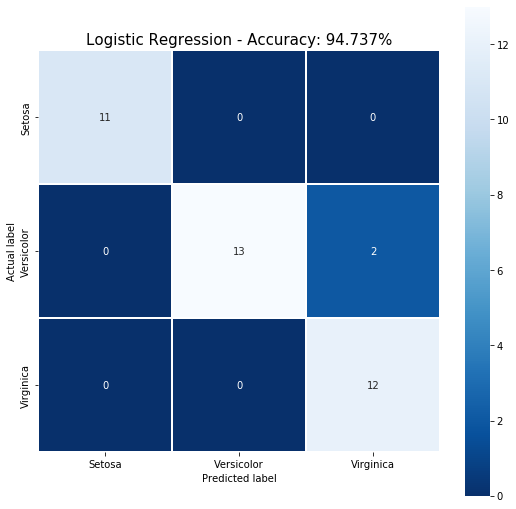

In [9]:
#Plotting the Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
names = np.array(['Setosa','Versicolor','Virginica'])
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
#, fmt=".3f"
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(names)
ax.set_yticklabels(names)
all_sample_title = 'Logistic Regression - Accuracy: {0:.3f}%'.format(score*100)
plt.title(all_sample_title, size = 15);
plt.show();

# KNN

In [10]:
### Case 1: Uniform weight and K = 1
### Case 2: Uniform weight and K = 5
### Case 3: Uniform weight and K = 20
### Case 4: Uniform weight and K = 50
### Case 5: Uniform weight and K = 100
### Case 6: Distance weight and K = 1
### Case 7: Distance weight and K = 5
### Case 8: Distance weight and K = 20
### Case 9: Distance weight and K = 50
### Case 10: Distance weight and K = 100

Case 1 - uniform weight, Knn Neighbours - 1


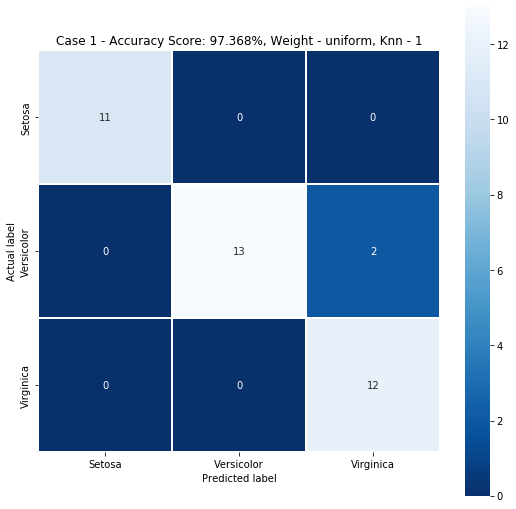

Case 2 - uniform weight, Knn Neighbours - 5


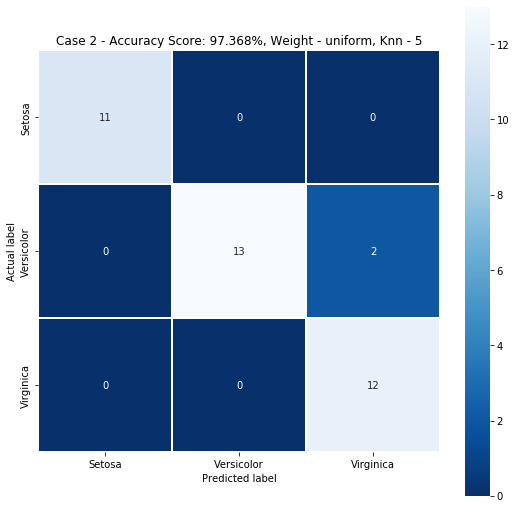

Case 3 - uniform weight, Knn Neighbours - 20


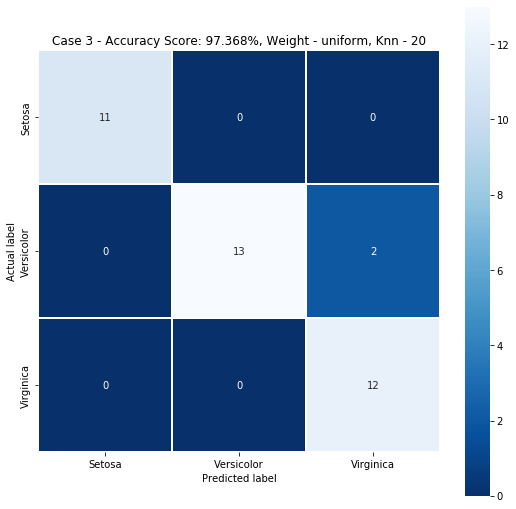

Case 4 - uniform weight, Knn Neighbours - 50


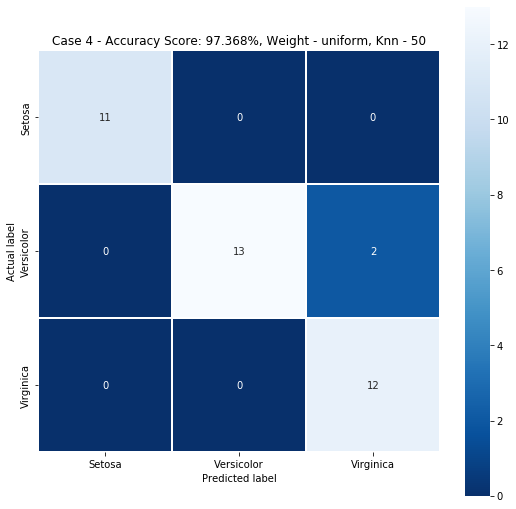

Case 5 - uniform weight, Knn Neighbours - 100


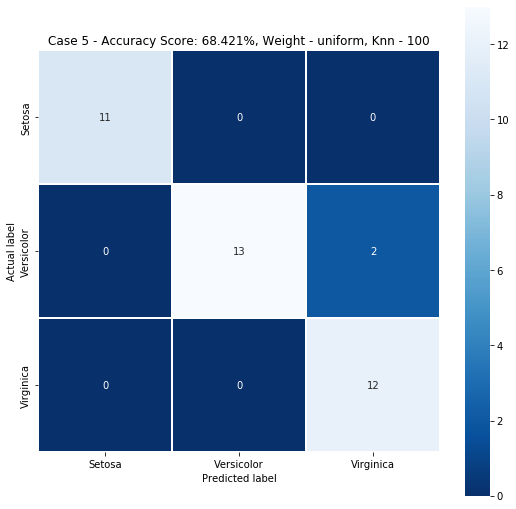

Case 6 - distance weight, Knn Neighbours - 1


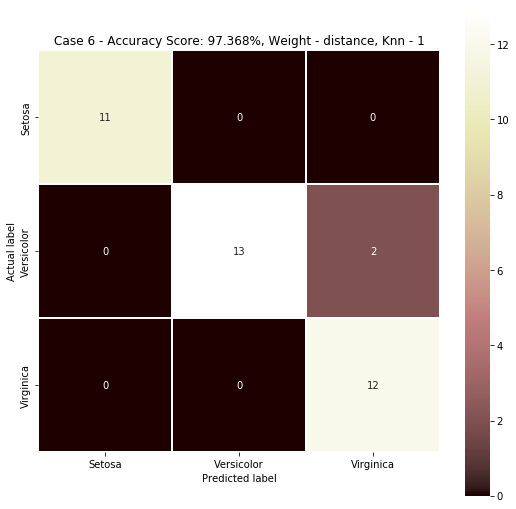

Case 7 - distance weight, Knn Neighbours - 5


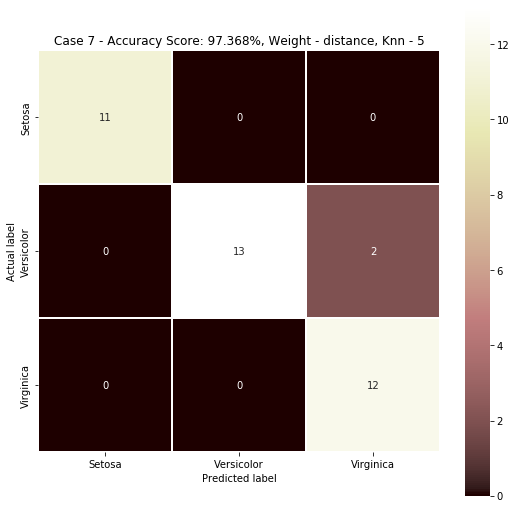

Case 8 - distance weight, Knn Neighbours - 20


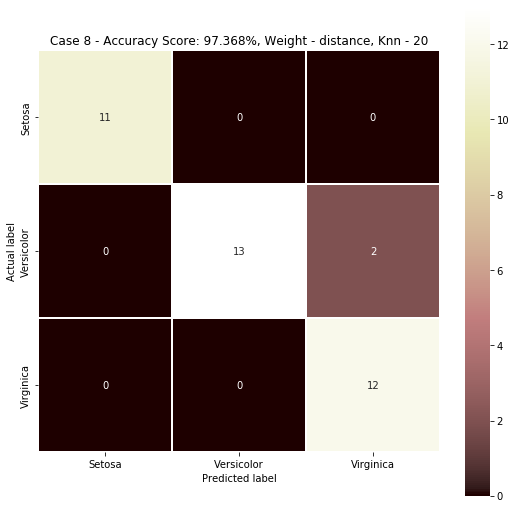

Case 9 - distance weight, Knn Neighbours - 50


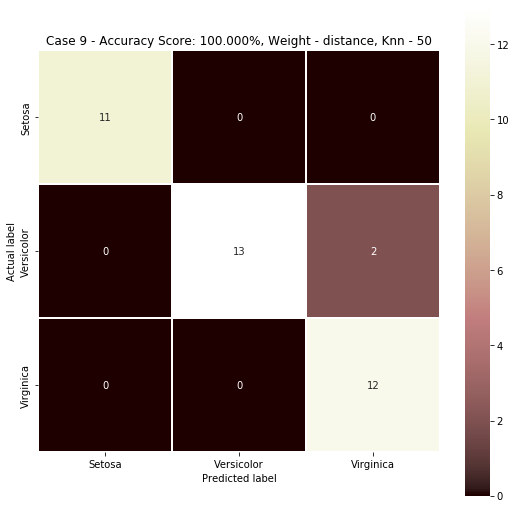

Case 10 - distance weight, Knn Neighbours - 100


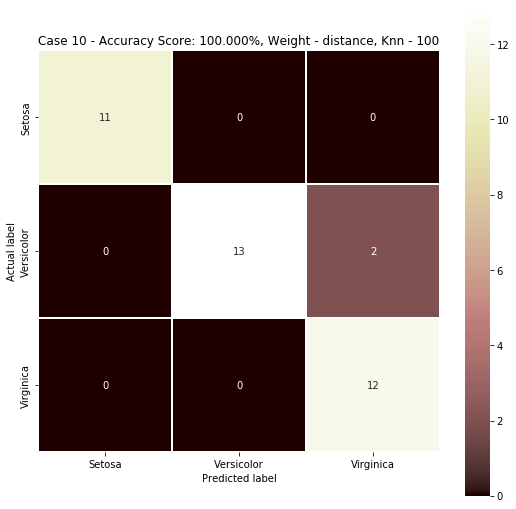

In [12]:
weights = ['uniform', 'distance']
# knn_neighbours = 1,5,20,50,100
knn_neighbours = [i for i in range(1,101)]
count = 0
uniform_accuracies = []
distance_accuracies = []
for weight in weights:
    for k in knn_neighbours:
       
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=k, weights= weight) 
        #Train the model using the training sets
        knn.fit(x_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(x_test)

        # Model Accuracy, how often is the classifier correct?
        knn_score = metrics.accuracy_score(y_test, y_pred)
        
        if weight == 'uniform':
            uniform_accuracies.append(knn_score*100)
        else:
            distance_accuracies.append(knn_score*100)

        # Plotting the confusion matrix only for few cases
        if k in [1,5,20,50,100]:
            count = count + 1
            print('Case {0} - {1} weight, Knn Neighbours - {2}'.format(count,weight,k))
            cm = metrics.confusion_matrix(y_test, predictions)
            names = np.array(['Setosa','Versicolor','Virginica'])
            fig, ax = plt.subplots(figsize=(9,9))
            cm_color = ['Blues_r','pink']
            if weight == 'uniform':
                sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = cm_color[0])
            else:
                sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = cm_color[1])
            #, fmt=".3f"
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            ax.set_xticklabels(names)
            ax.set_yticklabels(names)
            all_sample_title = 'Case {1} - Accuracy Score: {0:.3f}%, Weight - {2}, Knn - {3}'.format((knn_score*100),count,weight,k)
            plt.title(all_sample_title, size = 12);
            save_name = 'Case {0}-{1} weight & Knn-{2}'.format(count,weight,k)
            plt.show();

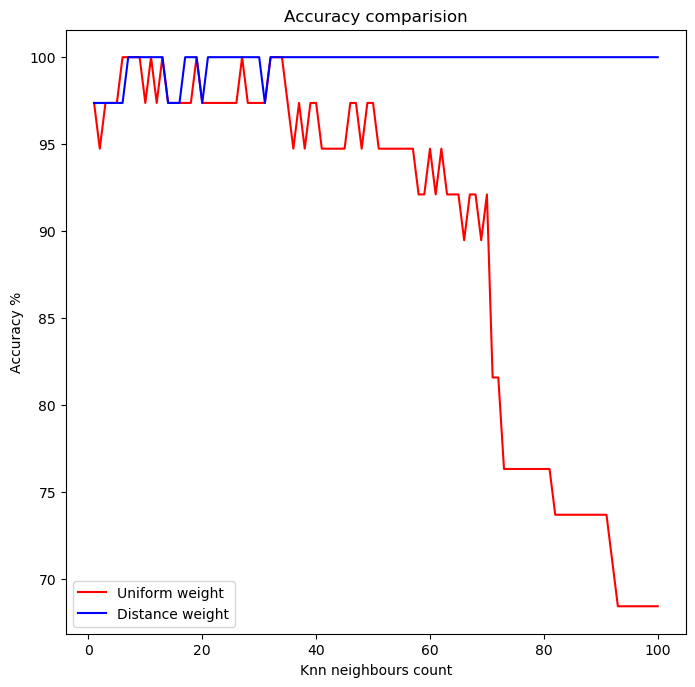

In [14]:
# Comparing accuracies

plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
plt.plot(knn_neighbours,uniform_accuracies,color='r',label='Uniform weight')
plt.plot(knn_neighbours,distance_accuracies,color='b',label='Distance weight')
plt.title('Accuracy comparision')
plt.xlabel('Knn neighbours count')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()